# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [95]:
# FAURE Guillaume 21108390
# LUCAS Garance 21200408

In [96]:
#%pip install lime
#stabilité des résultats, attribut corrélé, 

# TME 03 - Opérateurs d'agrégation et LIME

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [98]:
def moyenne_pondérée(x, w):
    return np.dot(x, w) 

In [99]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
moyenne_p = moyenne_pondérée(x, poids)
print(moyenne_p)


1.9000000000000001


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

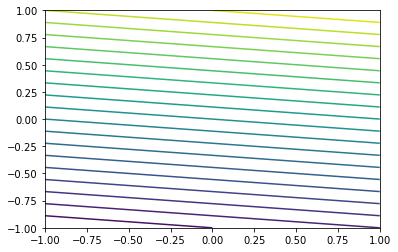

In [100]:
# Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
def lignes_niveaux(opérateur, x1_min, x1_max, x2_min, x2_max, nb_points = 200, nb_ligne=20):
    x1 = np.linspace(x1_min, x1_max, nb_points)
    x2 = np.linspace(x2_min, x2_max, nb_points)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.array([X1, X2])
    Z = np.zeros((nb_points, nb_points))
    for i in range(nb_points):
        for j in range(nb_points):
            Z[i,j] = opérateur(X[:, i, j])
    plt.contour(X1, X2, Z, nb_ligne)

lignes_niveaux(lambda x: moyenne_pondérée(x, poids), -1, 1, -1, 1)


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [101]:
def OWA(x, w):
    return np.sort(x) @ w

1.9000000000000001


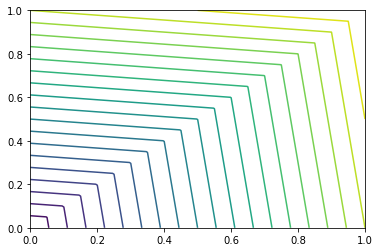

In [102]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
print(OWA(x, poids))
lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

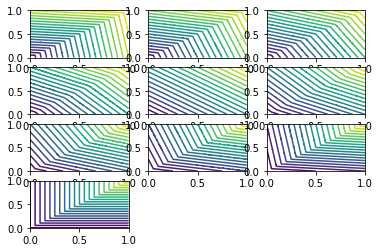

In [103]:
for i in range (1, 11):
    plt.subplot(4, 3, i )
    poids = np.array ([i/10, 1-i/10])
    lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)
plt.show()

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

In [104]:
#conjonctif
def min_conj(u,v):
    return np.minimum(u,v)
def max_conj(u,v):
    return max(u+v-1,0)
def mult(u,v):
    return u*v


#disjonctif
def max_dis(u,v):
    return np.maximum(u,v)
def plus_mul(u,v):
    return u+v-u*v
def min_dis(u,v):
    return min(u+v,1)

# compromis
def moyenne(x):
    return np.sum(x)/len(x)


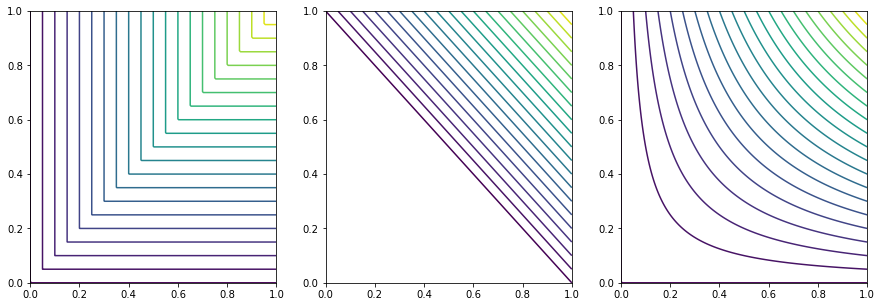

In [105]:
#conjonctif
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: min_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: max_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: mult(*x), 0, 1, 0, 1)

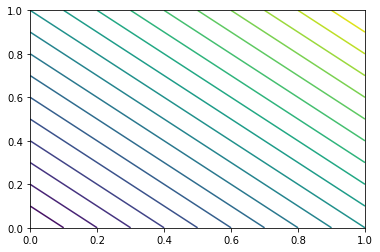

In [106]:
#compromis
lignes_niveaux(lambda x: moyenne(x), 0, 1, 0, 1)

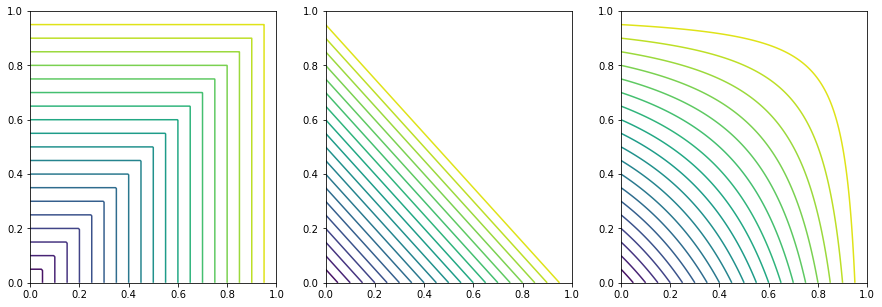

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: max_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: min_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: plus_mul(*x), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [108]:
import itertools
def choquet(x,mu):
    sigma = x.argsort()
    sigma2 = list(sigma.copy())
    sig=[]
    for i in reversed(range(len(x))):
        sig.append(frozenset(sigma2))
        sigma2.pop()
    sig.append(frozenset(()))

    c=[]
    for i in range(0, len(x)+1):
        combinations = itertools.combinations(sigma, i)
        for combination in combinations:
            c.append(frozenset(combination))
    mu_dic = {subset: n for subset, n in zip(c, mu)}

    choc = 0
    for i in range(len(x)):
        choc += np.subtract(mu_dic[sig[i]],mu_dic[sig[i-1]]) * x[sigma][i]
    return choc

x = np.array([16,1,13])
mu = [0,0.5,0.5,0.6,0.6,0.7,0.8,1]
print(choquet(x, mu))


-5.8


In [109]:
x = np.array([6,7])
mu = [0,0.5,0.9,1]
print(choquet(x, mu))

2.5


<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

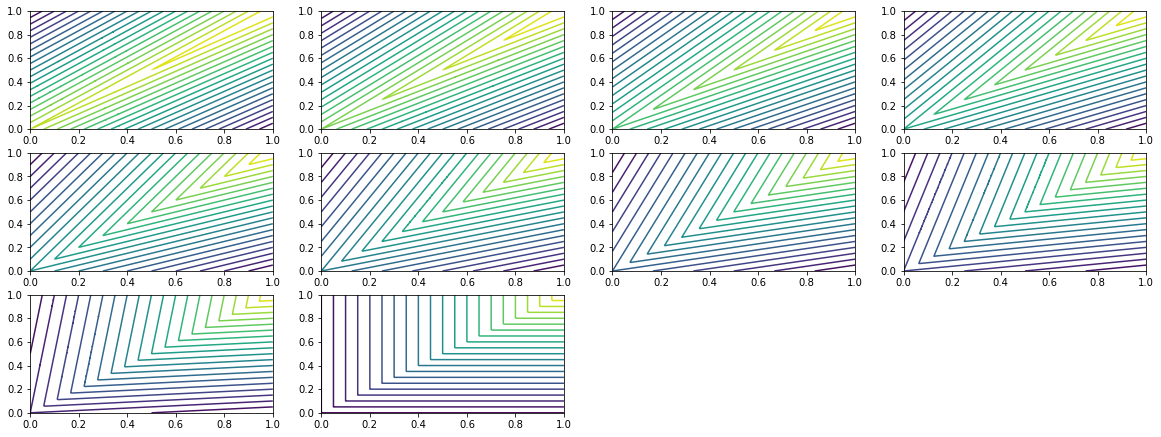

In [110]:
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(4, 4, i )
    lignes_niveaux(lambda x: choquet(np.array([*x]), mu =[0,i/10, 1-i/10,1]), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

# Commentaire :  A vereifier car les niveau me semble chelou

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [111]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [112]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [113]:
print(breast_cancer)
print(breast_cancer.keys())
print(breast_cancer['feature_names'])


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [114]:
X, y = datasets.load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [115]:
print(breast_cancer['feature_names'])
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [116]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [117]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [118]:
#%pip install seaborn

tn 52 fp 1 fn 6 tp 84
accuracy 0.951048951048951


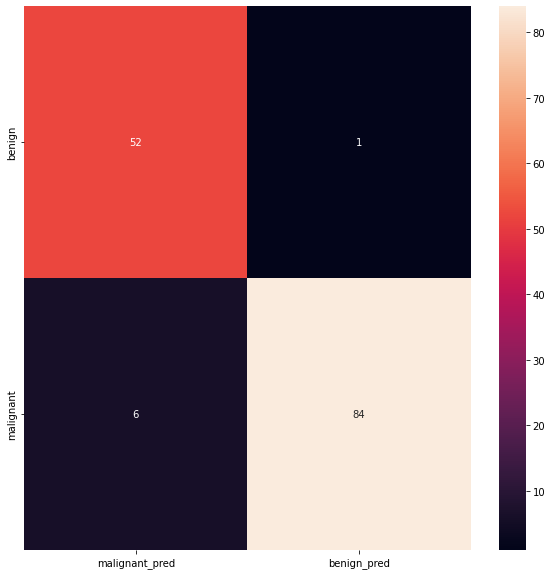

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

m = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn",tn,"fp",fp,"fn",fn,"tp",tp)
df_cm = pd.DataFrame(m, index = [target_names[1], target_names[0]],
                  columns = [    target_names[0]+"_pred", target_names[1]+"_pred"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
acc = accuracy_score(y_test, y_pred)
print("accuracy",acc)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.96

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

[ 0.66190254  0.16217328 -0.14716     0.02139994 -0.14684128 -0.16898114
 -0.34826323 -0.21116346 -0.29781311 -0.02566732 -0.02490166  1.04049519
 -0.00452951 -0.10980541 -0.01271142  0.06943453 -0.00328213 -0.02284313
 -0.02966001  0.01639379  0.32333911 -0.39027003 -0.22721131 -0.01056835
 -0.25804263 -0.57382696 -1.13266698 -0.45173965 -0.64173228 -0.08110189]


<AxesSubplot:>

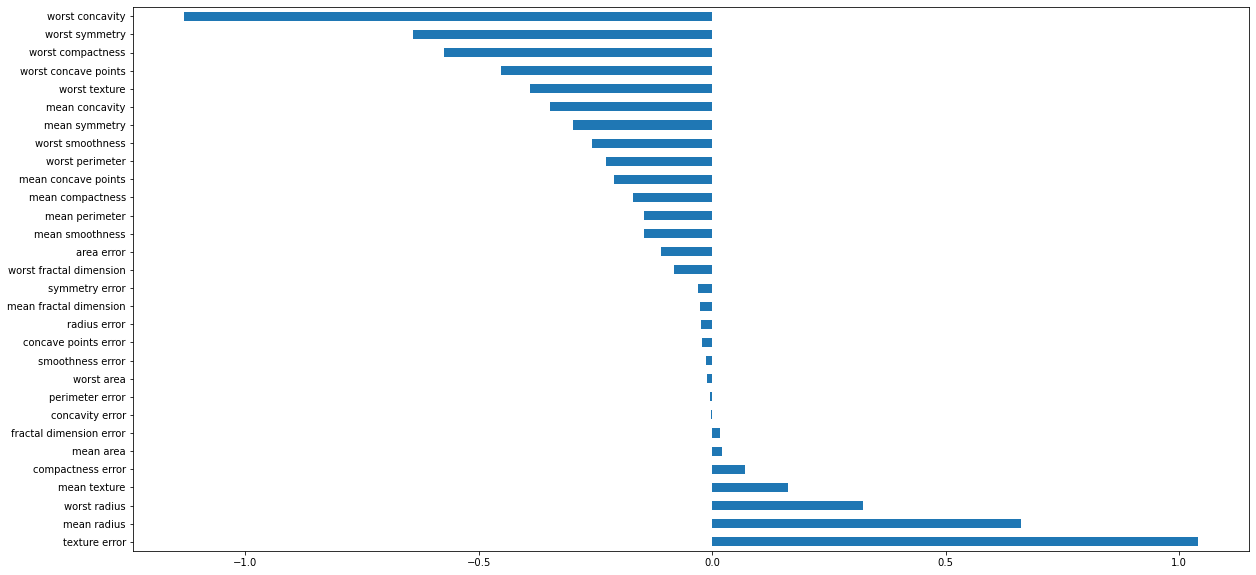

In [121]:
import pandas as pd
coefs = lr.coef_[0]
print(coefs)
plt.figure(figsize=(20,10))
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

Importance des caractéristiques pour le premier exemple de la base de test:
mean radius: 8.8695
mean texture: 3.3278
mean perimeter: -13.0443
mean area: 11.9133
mean smoothness: -0.0162
mean compactness: -0.0248
mean concavity: -0.0503
mean concave points: -0.0173
mean symmetry: -0.0630
mean fractal dimension: -0.0019
radius error: -0.0097
texture error: 0.9683
perimeter error: -0.0140
area error: -3.6971
smoothness error: -0.0001
compactness error: 0.0016
concavity error: -0.0001
concave points error: -0.0003
symmetry error: -0.0005
fractal dimension error: 0.0001
worst radius: 5.3060
worst texture: -11.5754
worst perimeter: -25.7430
worst area: -8.9239
worst smoothness: -0.0406
worst compactness: -0.2213
worst concavity: -0.5783
worst concave points: -0.0927
worst symmetry: -0.2301
worst fractal dimension: -0.0090


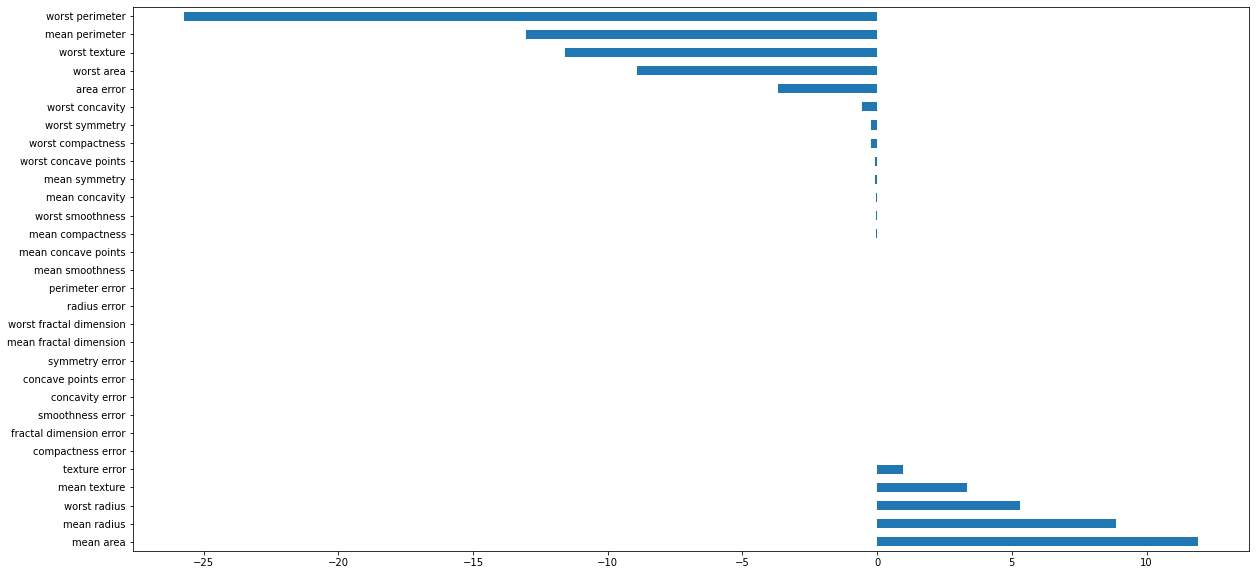

In [122]:
coefficients_ex = lr.predict_proba(x_test)[0]
print("Importance des caractéristiques pour le premier exemple de la base de test:")

coeffs = lr.coef_[0]

importances = x_test[0] * coeffs
plt.figure(figsize=(20,10))
pd.Series(importances, index=feature_names).nlargest(importances.size).plot(kind='barh')

for feature, coef in zip(feature_names, importances):
    print(f"{feature}: {coef:.4f}")

Importance des caractéristiques pour le premier exemple de la base de test:
mean radius: 8.7437
mean texture: 4.0949
mean perimeter: -12.3762
mean area: 11.5110
mean smoothness: -0.0129
mean compactness: -0.0088
mean concavity: -0.0097
mean concave points: -0.0044
mean symmetry: -0.0482
mean fractal dimension: -0.0014
radius error: -0.0052
texture error: 1.4047
perimeter error: -0.0060
area error: -1.9304
smoothness error: -0.0001
compactness error: 0.0006
concavity error: -0.0000
concave points error: -0.0001
symmetry error: -0.0004
fractal dimension error: 0.0000
worst radius: 4.6399
worst texture: -13.3589
worst perimeter: -20.7421
worst area: -6.6887
worst smoothness: -0.0333
worst compactness: -0.0610
worst concavity: -0.1574
worst concave points: -0.0271
worst symmetry: -0.1568
worst fractal dimension: -0.0055


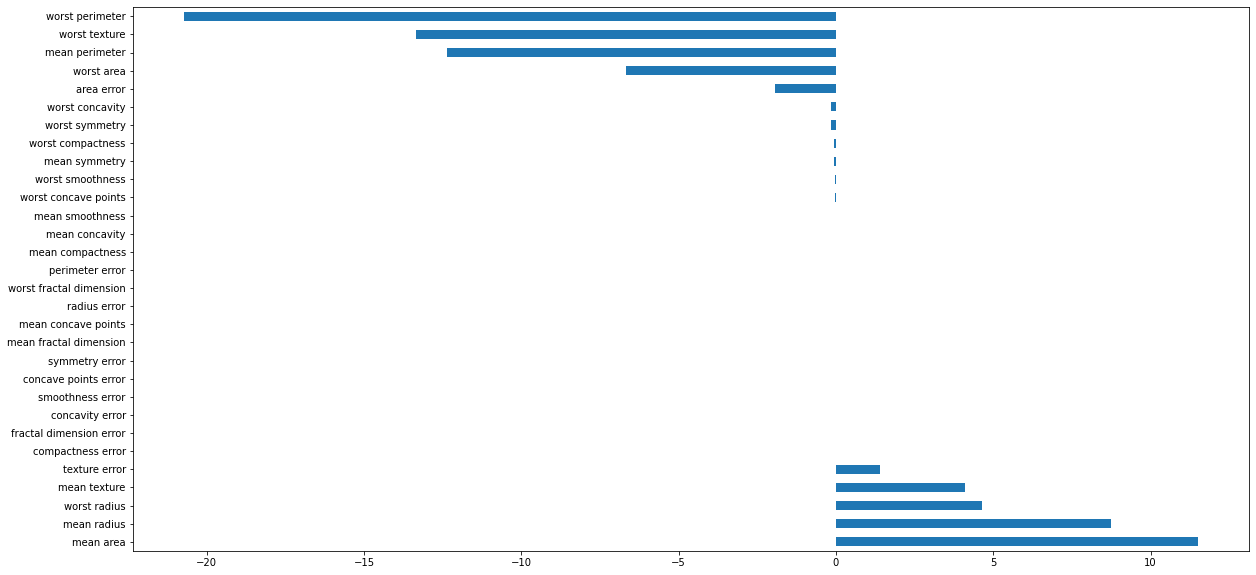

In [123]:
coefficients_ex = lr.predict_proba(x_test)[1]
print("Importance des caractéristiques pour le premier exemple de la base de test:")

coeffs = lr.coef_[0]

importances = x_test[1] * coeffs
plt.figure(figsize=(20,10))
pd.Series(importances, index=feature_names).nlargest(importances.size).plot(kind='barh')

for feature, coef in zip(feature_names, importances):
    print(f"{feature}: {coef:.4f}")

In [124]:
print(len(feature_names))

30


## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

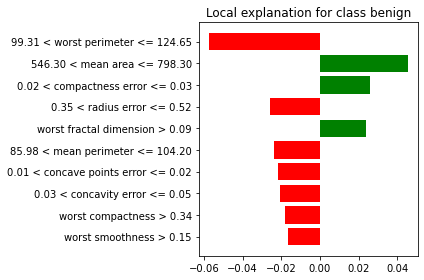

In [125]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(x_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')


exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.tight_layout()

Dans les explication locale de LIME pour la classe bénine, on voit que les caractéristiques les plus importantes pour l'explication correspondent pour la plupart aux importances du premier exemple de la base de test sauf pour fractal dimension error qui était ne semblait pas avoir d'importance dans la décision. De meme worst concavity semblait n'avoir que peu d'importance dans la décision contrairement à son poids dans Lime.

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

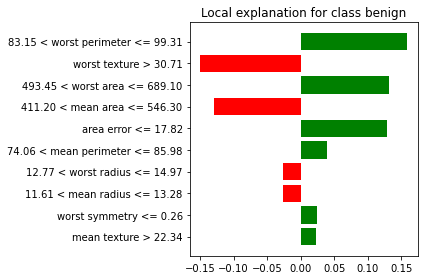

In [126]:
exp = explainer.explain_instance(x_test[1], lr.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

On voit que certaines variables comme worst perimeter , mean area, mean perimeter ont un role explicatif opposé dans la probabilité de prédire la classe bénine. Certaines veriables qui n'avait que peut de role dans la décision (non présente dans les 10 variables les plus importantes du 1er exemple) ont pour cet exemple une importance plus élevée (ex: area error)

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

[('99.31 < worst perimeter <= 124.65', -0.06235367449893995), ('689.10 < worst area <= 1060.00', -0.049595430419199595), ('25.82 < worst texture <= 30.71', -0.041432239458660466), ('13.28 < mean radius <= 16.02', 0.04038234349020823), ('18.94 < mean texture <= 22.34', 0.032716542302921627), ('worst concavity > 0.39', -0.028139935227336828), ('85.98 < mean perimeter <= 104.20', -0.027592615621567), ('0.00 < fractal dimension error <= 0.00', -0.026793551217699763), ('26.44 < area error <= 45.40', 0.02479453649619775), ('mean smoothness > 0.10', 0.02061447538750339)]


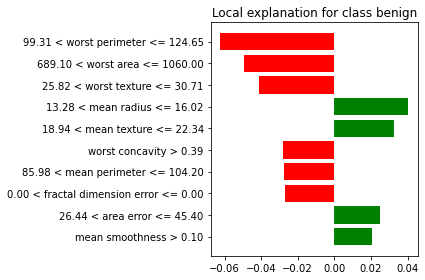

In [127]:
exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)
print(exp.as_list())
exp.as_pyplot_figure()
plt.tight_layout()

accuracy lr 0.951048951048951
accuracy svm 0.9370629370629371
accuracy rf 0.9790209790209791
[('99.31 < worst perimeter <= 124.65', -0.07775653058888013), ('worst concave points > 0.16', -0.051188656937518326), ('546.30 < mean area <= 798.30', 0.043486017872978004), ('0.35 < radius error <= 0.52', 0.03971473187112399), ('0.01 < smoothness error <= 0.01', 0.03879685555735831), ('13.28 < mean radius <= 16.02', 0.03666272589103913), ('18.94 < mean texture <= 22.34', 0.03514672535380721), ('0.85 < texture error <= 1.09', -0.03178520699332666), ('85.98 < mean perimeter <= 104.20', -0.02415403720247979), ('0.01 < concave points error <= 0.02', -0.022516604796702554)]
[('worst texture > 30.71', -0.16750987278488985), ('83.15 < worst perimeter <= 99.31', 0.16293191798818024), ('411.20 < mean area <= 546.30', -0.13553830753642276), ('493.45 < worst area <= 689.10', 0.12981347724999345), ('area error <= 17.82', 0.11216339344843151), ('74.06 < mean perimeter <= 85.98', 0.06503484272429925), ('mea

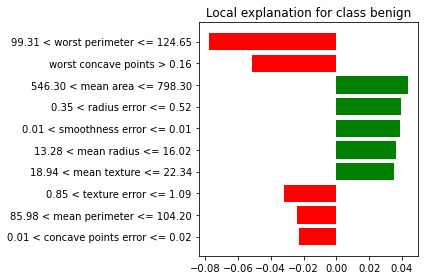

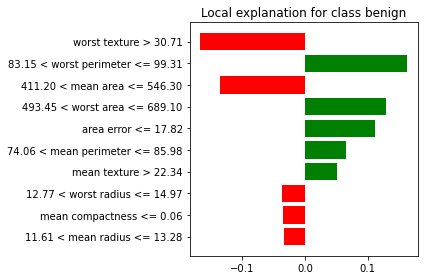

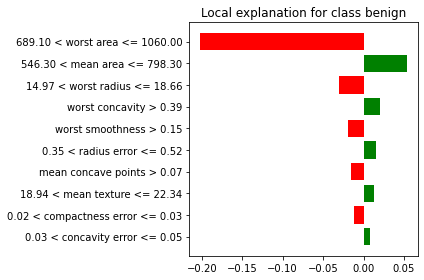

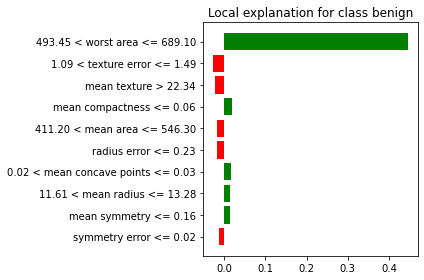

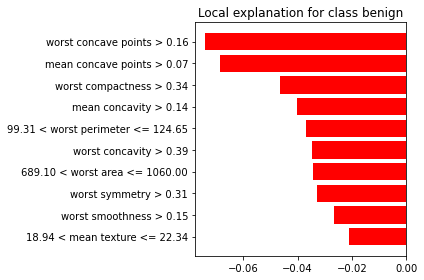

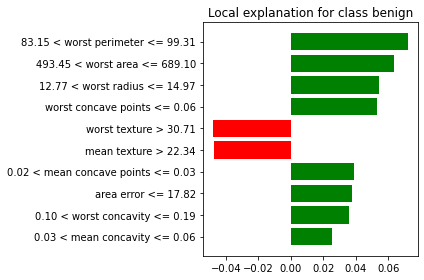

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train,y_train)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred_lr = lr.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_rf = rf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

f1_lr = f1_score(y_test, y_pred_lr, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print("accuracy lr",acc_lr)
print("accuracy svm",acc_svm)
print("accuracy rf",acc_rf)


X_sain = x_test[y_pred_lr==0]
X_malade = x_test[y_pred_lr==1]


exp_lr_sain = explainer.explain_instance(X_sain[0], lr.predict_proba, num_features=10)
print(exp_lr_sain.as_list())
exp_lr_sain.as_pyplot_figure()
plt.tight_layout()

exp_lr_malade = explainer.explain_instance(X_malade[0], lr.predict_proba, num_features=10)
print(exp_lr_malade.as_list())
exp_lr_malade.as_pyplot_figure()
plt.tight_layout()

exp_svm_sain = explainer.explain_instance(X_sain[0], svm.predict_proba, num_features=10)
print(exp_svm_sain.as_list())
exp_svm_sain.as_pyplot_figure()
plt.tight_layout()

exp_svm_malade = explainer.explain_instance(X_malade[0], svm.predict_proba, num_features=10)
print(exp_svm_malade.as_list())
exp_svm_malade.as_pyplot_figure()
plt.tight_layout()

exp_rf_sain = explainer.explain_instance(X_sain[0], rf.predict_proba, num_features=10)
print(exp_rf_sain.as_list())
exp_rf_sain.as_pyplot_figure()
plt.tight_layout()

exp_rf_malade = explainer.explain_instance(X_malade[0], rf.predict_proba, num_features=10)
print(exp_rf_malade.as_list())
exp_rf_malade.as_pyplot_figure()
plt.tight_layout()

In [129]:
def moy_var(X,model,num_features,nb_ex):
    caracteristique=[]
    car=[]
    d = x_test.shape[1]
    for i in range(nb_ex):
        exp = explainer.explain_instance(X[i], model.predict_proba, num_features=num_features)
        e = exp.as_list()
        for j in e:
            car.append(j[1])
        caracteristique.append(car)
    final = np.zeros((nb_ex,d))
    for i in range(len(caracteristique)):
        for j in range(len(caracteristique[i])):
            final[i][j] = caracteristique[i][j]
    return np.mean(final, axis=0),np.var(final, axis=0)

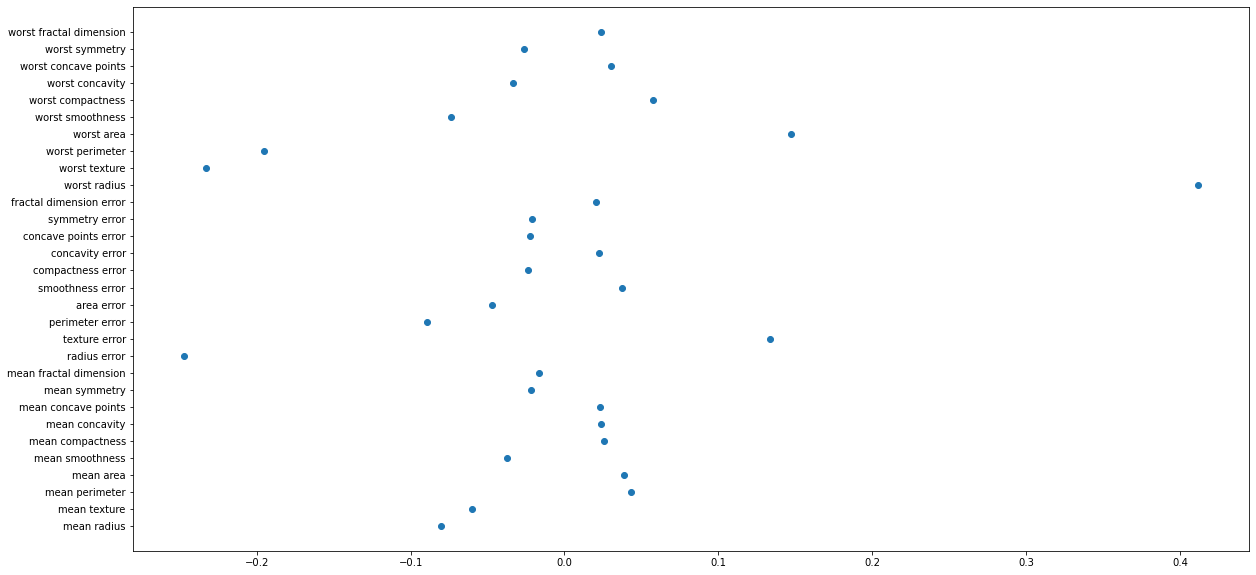

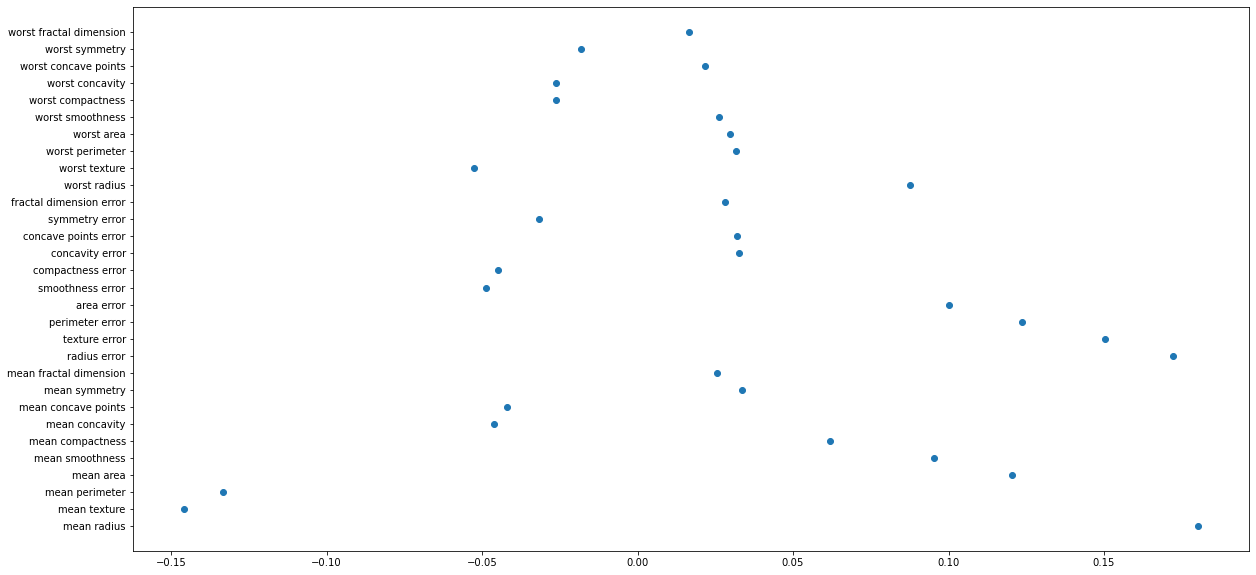

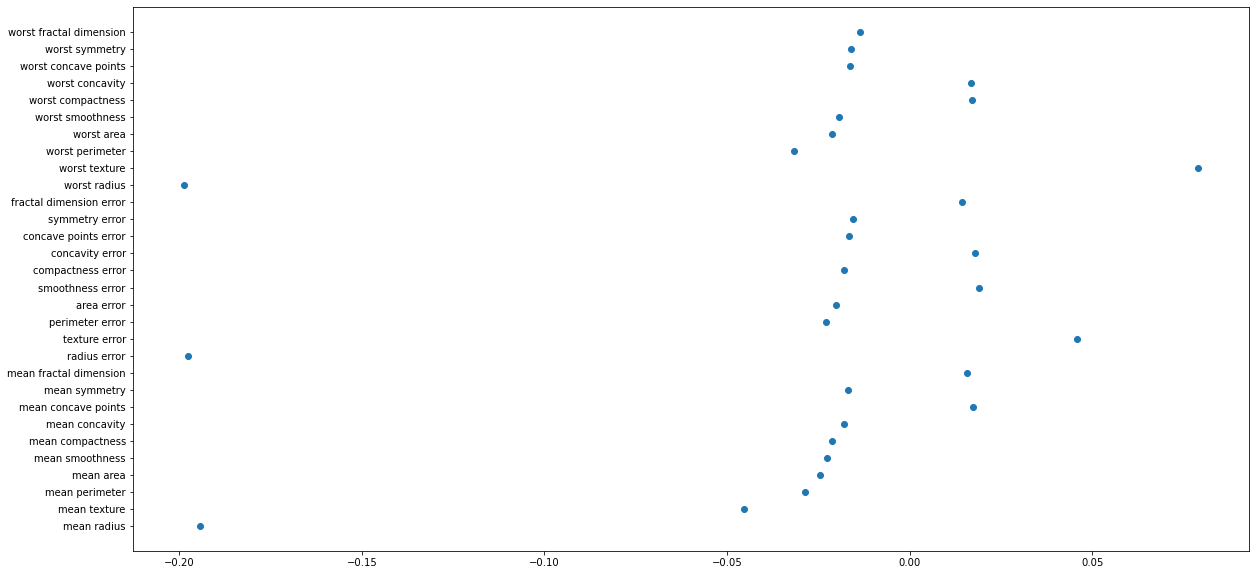

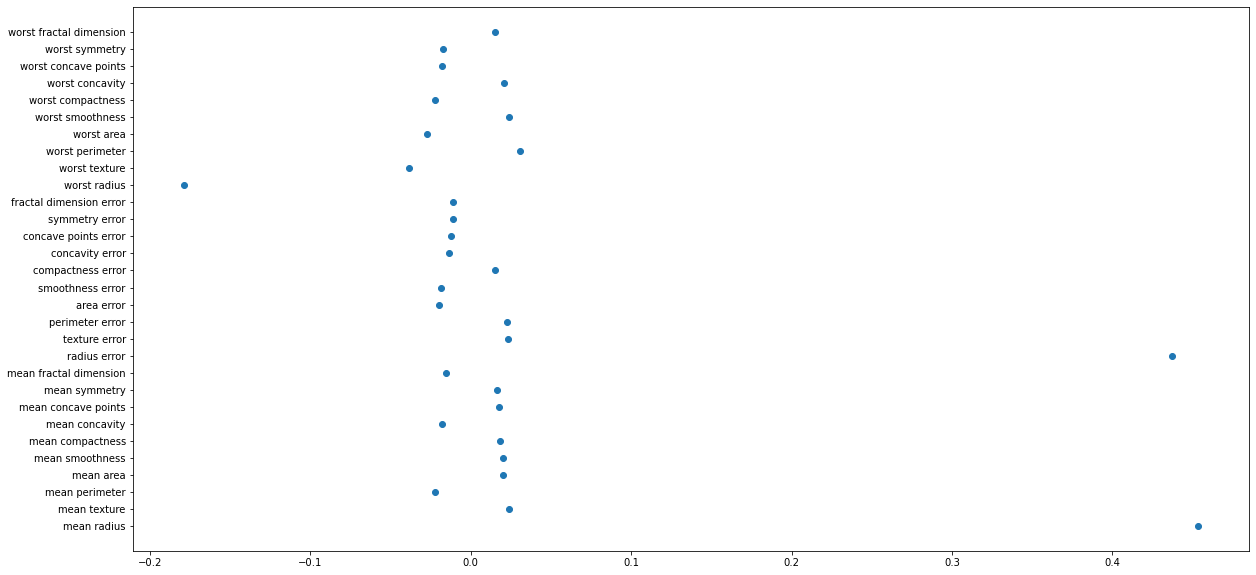

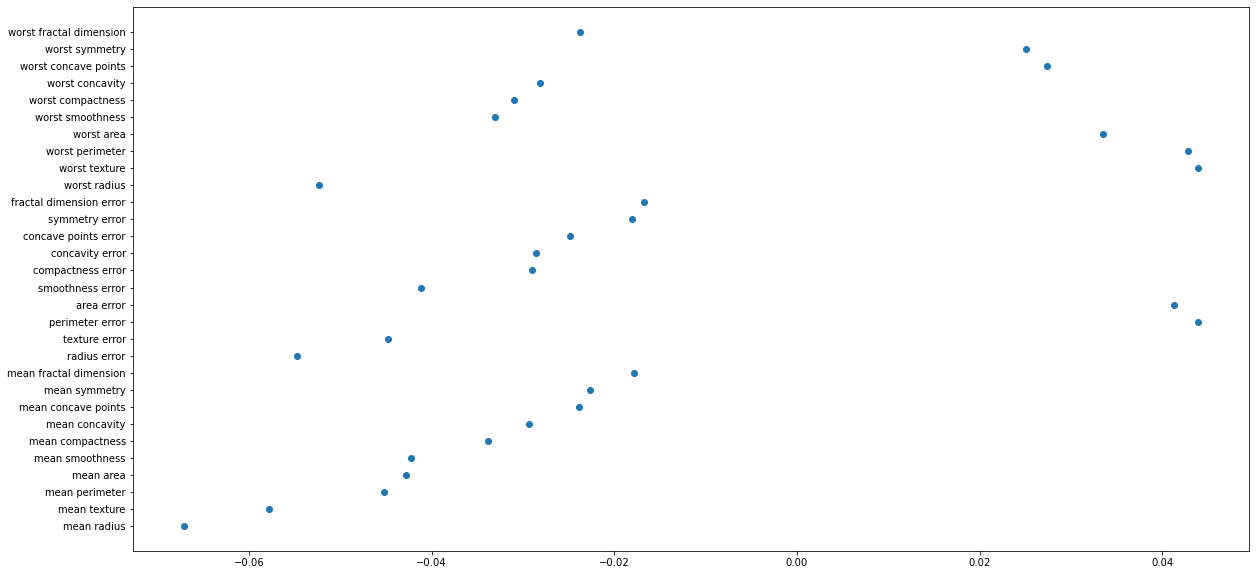

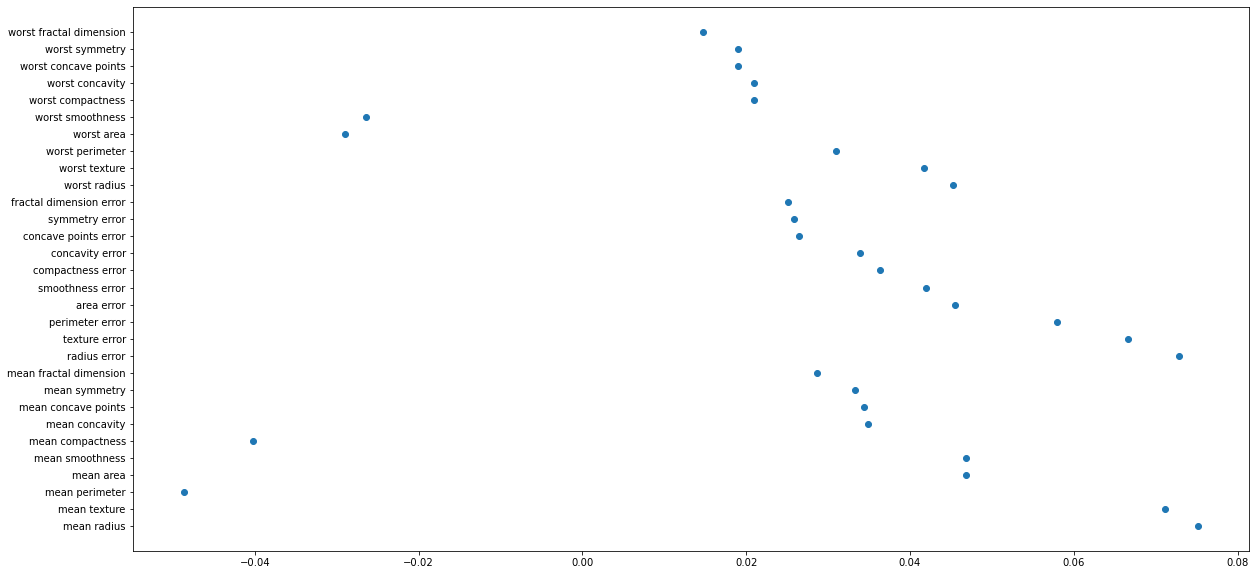

In [130]:
model = [lr,svm,rf]
echantillon = [X_sain,X_malade]
for i in range(len(model)):
    for j in echantillon:
        m,v = moy_var(j,model[i],10,3)
        plt.figure(figsize=(20,10))
        plt.scatter(m ,feature_names)
        plt.show()

In [131]:
print(m,v)

[ 0.07518837  0.07116998 -0.0486973   0.04690037  0.04686852 -0.04019982
  0.03486504  0.03434312  0.03334483  0.02870452  0.0728827   0.06657137
  0.0579724   0.04549344  0.04196496  0.03630012  0.03384592  0.02642271
  0.02580188  0.02508991  0.0452978   0.04175183  0.03097477 -0.02900414
 -0.02646026  0.02098815  0.02096963  0.01902559  0.01895366  0.01476079] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.81482486e-35 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.20370622e-35 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.81482486e-35 0.00000000e+00 0.00000000e+00
 1.20370622e-35 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
# making class names shorter
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]
class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'

In [133]:
print(','.join(class_names))

atheism,graphics,ms-windows.misc,pc.hardware,mac.hardware,x,misc.forsale,autos,motorcycles,baseball,hockey,crypt,electronics,med,space,christian,guns,mideast,politics.misc,religion.misc


In [225]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False, stop_words='english', token_pattern=r'\b[^\d\W_]+\b')
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [226]:
rf = RandomForestClassifier()
rf.fit(train_vectors,newsgroups_train.target)


RandomForestClassifier()

In [227]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')

0.7589302198868554

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

In [228]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)
print(c.predict_proba([newsgroups_test.data[0]]).round(3))

[[0.04 0.08 0.03 0.12 0.09 0.03 0.13 0.04 0.02 0.13 0.05 0.01 0.07 0.02
  0.05 0.01 0.   0.   0.03 0.05]]


In [229]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [230]:
idx = 5
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=20, labels=[0, 17])
print('Document id: %d' % idx)
print('Predicted class =', class_names[rf.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 5
Predicted class = med
True class: med


In [231]:
print(f'Explanation for exemple {idx} class {class_names[rf.predict(test_vectors[idx]).reshape(1,-1)[0,0]]}')
print ('\n'.join(map(str, exp.as_list(label=0))))

Explanation for exemple 5 class med
('article', 0.01467791262774325)
('diet', 0.009724796862536206)
('patients', -0.009547604283228355)
('Candida', -0.008636845199256199)
('yeast', -0.008228584641214105)
('m', -0.00742422868032276)
('medical', -0.006425395797437604)
('t', -0.0062747081472626955)
('written', 0.006169620346558042)
('apply', 0.005502807487378681)
('non', 0.005405706337732784)
('po', 0.005276303226334643)
('called', -0.005273157119584124)
('just', -0.004574631813171919)
('hate', -0.004553274240044924)
('said', 0.004140388781477538)
('book', 0.004069805415937415)
('infection', 0.0033634509591022833)
('CWRU', 0.0031816406699934235)
('does', 0.003159122225005169)


on peut aussi demander à LIME  de générer des labels pour le top K classes par exemple K=2:

In [232]:
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6, top_labels=2)
print(exp.available_labels())

[13, 18]


In [233]:
exp.show_in_notebook(text=True)

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

In [234]:
import numpy as np
import scipy as sp
import copy as cp

def generate(x, p=10, num_dim=1):
    """
    Génère p exemples aléatoires proches de l'exemple x en changeant aléatoirement un nombre spécifié de dimensions binaires.
    :param x: Vecteur binaire de dimension d
    :param p: Nombre d'exemples voisins à générer
    :param num_dim: Nombre de dimensions binaires à changer dans chaque exemple voisin
    :return: Liste de vecteurs binaires voisins
    """
    d = x.size
    neighbors = []

    for _ in range(p):
        neighbor = x.copy()
        change_indices = np.random.choice(d, num_dim, replace=False)  # Indices des dimensions à changer
        neighbor[change_indices] = 1 - neighbor[change_indices]  # Inversion des valeurs binaires
        neighbors.append(neighbor)

    return np.array(neighbors)


def lime_perso(x, model, model_explicatif = sklearn.linear_model.LinearRegression(),p=10, num_dim = 2 ):
    ''' Implémentation de lime pour un exemple x donné
    :param x: Vecteur binaire de dimension d
    :param p: Nombre d'exemples voisins à générer
    :param num_dim: Nombre de dimensions binaires à changer dans chaque exemple voisin
    :return: 
    '''

    neigbors = generate(x, p, num_dim)
    print(neigbors)
    predictions_neighbors_cplx = model.predict(neigbors)
    prediction_x_cplx = model.predict(x.reshape(1,-1))

    model_explicatif.fit(neigbors, predictions_neighbors_cplx)
    predictions_neighbors = model_explicatif.predict(neigbors)
    prediction_x = model_explicatif.predict(x.reshape(1,-1))
    sklearn.metrics.accuracy_score(predictions_neighbors, predictions_neighbors_cplx)
    sklearn.metrics.f1_score(predictions_neighbors, predictions_neighbors_cplx, average='weighted')

    # extraire les coefficient de la regression lineaire
    return model_explicatif, prediction_x, predictions_neighbors, predictions_neighbors_cplx

def plot_lime_perso(coefs):
    plt.figure(figsize=(20,10))
    pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

def pre(x):
    return np.array(sp.sparse.csr_matrix.todense(train_vectors[idx])).reshape(-1)

texte = pre(newsgroups_test.data[idx])
l1 = lime_perso(texte, rf, sklearn.linear_model.LogisticRegression(), p=1000, num_dim=50000)

[[0. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/pidoux/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
print(class_names[int(l1[1])])
print(l1[2])
sklearn.metrics.accuracy_score(l1[2], l1[3])
print(l1[0].coef_[0])

mideast
[17 10  0  0 17 10  0 17 17 15 15 11 17 11 15 17 17  0 17 11 17  9 11 10
 17 10  0 17  7 17 17 11 14 11 17 17 11  8 17 11 17 17 17  0 10 11 11 17
  0 17 17 17 10 17 17  0  0 17  0 17 17  0 18 10  0 17 10 15 10 11 17 17
  8 17  9 17 18 11 11 17 17  0 17 17 10 17  0 15 10  0 11 17 17 17 10  2
 11 10 11 10 17 11 10 17 10 11 17 17 11 10  0  0 17 11  8 16 10 11 11 11
 17 17 17  0  0 17 10 10 17 11 10 17 17 17  0 17 10 17 17 17  0 17 17  0
 13 17 11 17 10 17 11 17 17  0  0 17  8 17 10 10  0 11  0 11 11 17 10 10
 17  0  0 11 10 10 10  0  9 17 13 17 11  7 11 10 10 17  0  9  8 10 11 10
  0 11  0 11 17 11 11  0 11  0 17 17 11 11  0 11  9 17 11 15 11 10 11 11
 17 11 17 15  0 11  0 11 11 17 17 11 17 10  0  0 17 11  0 11 11  0 17  0
 11  9 17 10 17 17  9 10 17 18 17 11 10 17 11 10  9  0 17 17 11 17 17  9
  0 17 17 17 10 17 10 10 11 10  0 10 10 10 10 17 10  0 10 11 17 17  0 10
 11 17  0 10 10  0 10 17 17 11 17  0 18 17 11 17  0  0 18 11 11 17  0 10
 11 11 11  8 11  9 17 10 11 10 17  2 17 17 

In [241]:
def get_10_biggest_and_smallest(listee):
    sorted(listee)
    smallest = listee[:10]
    biggest = listee[-10:]

    big = []
    small=[]
    for i, item in enumerate(biggest):
        big.append((item, i))
    for i, item in enumerate(smallest):
        small.append((item, i))

    return big,small

In [242]:
print(l1[0].coef_[0])

[-0.00012088  0.00077818 -0.0008566  ... -0.00161654  0.00096045
  0.00137663]


In [243]:
vectorizer.get_feature_names_out()

array(['A', 'AA', 'AAA', ..., 'ýé', 'þ', 'ÿ'], dtype=object)

In [244]:
g = get_10_biggest_and_smallest(l1[0].coef_[0])
print('biggest')
for i,j in g[0]:
    print(vectorizer.get_feature_names_out()[j], ': poids =', i)
print('\n')
print('smallest')
for i,j in g[1]:
    print(vectorizer.get_feature_names_out()[j], ': poids =', i)

biggest
A : poids = -0.00018901867396819513
AA : poids = 0.002051343113730995
AAA : poids = -0.001310645241105722
AAAA : poids = 0.0018483458547270822
AAAAAAAAAAAA : poids = -0.0005672124702711746
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUGGGGGGGGGGGGGGGG : poids = 0.0023053734576580875
AAAAAGGGGHHHH : poids = 0.0026907539806353352
AAAHHHH : poids = -0.0016165356652821964
AAAI : poids = 0.0009604471566702994
AACC : poids = 0.0013766342358523863


smallest
A : poids = -0.00012088211926377396
AA : poids = 0.0007781793655564951
AAA : poids = -0.0008566043493462913
AAAA : poids = -0.0005392833041299953
AAAAAAAAAAAA : poids = 0.00039942474001397935
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUGGGGGGGGGGGGGGGG : poids = 0.0007463516816393644
AAAAAGGGGHHHH : poids = 0.00538396040054263
AAAHHHH : poids = -0.0018526988330140157
AAAI : poids = -8.392906764067271e-05
AACC : poids = 0.000829846132366668


In [ ]:

texte = pre(newsgroups_test.data[idx])
modele_simple = sklearn.tree.DecisionTreeClassifier(max_depth=5)
l2 = lime_perso(texte, rf,modele_simple, p=1000, num_dim=400)
#plot_lime_perso(l[0].coef_[0])

<function matplotlib.pyplot.show(close=None, block=None)>

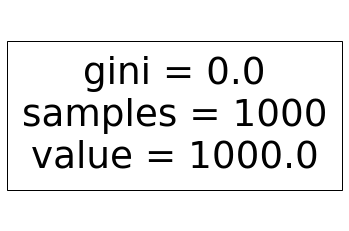

In [184]:
from sklearn import tree
tree.plot_tree(l2[0], filled=True)
plt.show